# App Rating Prediction (GooglePlayStore)

In [109]:
# importing essential libraries
import numpy as np
import pandas as pd

##  1. Load the data file using pandas

In [110]:
# 1. Load the data file using pandas

PlayStoreData = pd.read_csv('G:\\DS----PYTHON\\PYTHON ----   MAY ---08\\PROJECT --- PYTHON\\1569582940_googleplaystore\\googleplaystore.csv')
PlayStoreData.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [111]:
# Technique we want to follow for PlayStoreData preprocessing steps in order to do further analysis

## Check the distribution and type of the data
## Identify and remove outliers
## Identify to deal with inappropriate data
## Identify and deal with missing values

In [112]:
# to know for how many rows and columns are there in our dataset

PlayStoreData.shape

# We got 13 columns and 10841 rows/records
# (10841, 13)

(10841, 13)

In [113]:
## Check the  datatype of each column present in our dataset using info function

PlayStoreData.info()

 #   Column          Non-Null Count  Dtype  
#---  ------          --------------  -----  
# 0   App             10841 non-null  object -------- categorical (unique entries)
# 1   Category        10841 non-null  object -------- categorical
# 2   Rating          9367 non-null   float64 ------- numerical ---- discrete (need to convert it into categorical)
# 3   Reviews         10841 non-null  object --------  ordinal
# 4   Size            10841 non-null  object -------- ordinal (need to convert it into numeric)
# 5   Installs        10841 non-null  object -------- ordinal (need to convert it into numeric)
# 6   Type            10840 non-null  object -------- Categorical
# 7   Price           10841 non-null  object -------- ordinal  (need to convert it into numeric)
# 8   Content Rating  10840 non-null  object -------- categorical
# 9   Genres          10841 non-null  object -------- categorical
# 10  Last Updated    10841 non-null  object -------- ordinal
# 11  Current Ver     10833 non-null  object -------- ordinal
# 12  Android Ver     10838 non-null  object -------- ordinal

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [114]:
PlayStoreData['Android Ver'].unique()

array(['4.0.3 and up', '4.2 and up', '4.4 and up', '2.3 and up',
       '3.0 and up', '4.1 and up', '4.0 and up', '2.3.3 and up',
       'Varies with device', '2.2 and up', '5.0 and up', '6.0 and up',
       '1.6 and up', '1.5 and up', '2.1 and up', '7.0 and up',
       '5.1 and up', '4.3 and up', '4.0.3 - 7.1.1', '2.0 and up',
       '3.2 and up', '4.4W and up', '7.1 and up', '7.0 - 7.1.1',
       '8.0 and up', '5.0 - 8.0', '3.1 and up', '2.0.1 and up',
       '4.1 - 7.1.1', nan, '5.0 - 6.0', '1.0 and up', '2.2 - 7.1.1',
       '5.0 - 7.1.1'], dtype=object)

In [115]:
## Identify and remove outliers
# Identifying columns for checking outliers and statistical description usning describe function

PlayStoreData.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


## 2. Check for null values in the data. Get the number of null values for each column.

In [116]:


# We will check for null values in our dataset of each column using isna() function

PlayStoreData.isna().sum()

# PlayStoreData.isna().sum() helps us to get number of null values present of each column

# Rating            1474
# Type                 1
# Content Rating Check the  datatype of each column present in our dataset using info function

PlayStoreData.info()

# Current Ver          8
# Android Ver          3

## These columns have null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


## 3. Drop records with nulls in any of the columns.

In [117]:
 

# We will drop records where null values are present using dropna() function
# dropna() is used for dropping those NaN present records

PlayStoreData.dropna(inplace=True)
# This will remove those records containing null values


In [118]:
# We can check again where null values records removed or not using 
PlayStoreData.isna().sum()

#App               0
#Category          0
#Rating            0
#Reviews           0
#Size              0
#Installs          0
#Type              0
#Price             0
#Content Rating    0
#Genres            0
#Last Updated      0
#Current Ver       0
#Android Ver       0

# We can see no records are there whose containing null values

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [119]:
# checking how many records are present in the dataset after droping records containing null values
PlayStoreData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9360 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9360 non-null   object 
 1   Category        9360 non-null   object 
 2   Rating          9360 non-null   float64
 3   Reviews         9360 non-null   object 
 4   Size            9360 non-null   object 
 5   Installs        9360 non-null   object 
 6   Type            9360 non-null   object 
 7   Price           9360 non-null   object 
 8   Content Rating  9360 non-null   object 
 9   Genres          9360 non-null   object 
 10  Last Updated    9360 non-null   object 
 11  Current Ver     9360 non-null   object 
 12  Android Ver     9360 non-null   object 
dtypes: float64(1), object(12)
memory usage: 1023.8+ KB


In [120]:
PlayStoreData.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


## 4. Variables seem to have incorrect type and inconsistent formatting. You need to fix them

In [121]:

## 1> Size column has sizes in Kb as well as Mb. To analyze, you’ll need to convert these to numeric.

### 1.Extract the numeric value from the column

### 2. Multiply the value by 1,000, if size is mentioned in Mb

## 2> Reviews is a numeric field that is loaded as a string field. Convert it to numeric (int/float).

## 3> Installs field is currently stored as string and has values like 1,000,000+. 

### 1.Treat 1,000,000+ as 1,000,000

### 2. remove ‘+’, ‘,’ from the field, convert it to integer

## 4> Price field is a string and has $ symbol. Remove ‘$’ sign, and convert it to numeric.

In [122]:
# check for datatype of Size column

PlayStoreData.info()
# 4   Size            9360 non-null   object

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9360 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9360 non-null   object 
 1   Category        9360 non-null   object 
 2   Rating          9360 non-null   float64
 3   Reviews         9360 non-null   object 
 4   Size            9360 non-null   object 
 5   Installs        9360 non-null   object 
 6   Type            9360 non-null   object 
 7   Price           9360 non-null   object 
 8   Content Rating  9360 non-null   object 
 9   Genres          9360 non-null   object 
 10  Last Updated    9360 non-null   object 
 11  Current Ver     9360 non-null   object 
 12  Android Ver     9360 non-null   object 
dtypes: float64(1), object(12)
memory usage: 1023.8+ KB


### 1> Size column has sizes in Kb as well as Mb. To analyze, you’ll need to convert these to numeric.

In [123]:


### 1.Extract the numeric value from the column

### 2. Multiply the value by 1,000, if size is mentioned in Mb



In [124]:
# Check for the values which are present in the Size column using unique() function
PlayStoreData['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '5.5M', '17M', '39M', '31M',
       '4.2M', '23M', '6.0M', '6.1M', '4.6M', '9.2M', '5.2M', '11M',
       '24M', 'Varies with device', '9.4M', '15M', '10M', '1.2M', '26M',
       '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k', '3.6M', '5.7M',
       '8.6M', '2.4M', '27M', '2.7M', '2.5M', '7.0M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '22M', '6.4M', '3.2M', '8.2M', '4.9M', '9.5M', '5.0M',
       '5.9M', '13M', '73M', '6.8M', '3.5M', '4.0M', '2.3M', '2.1M',
       '42M', '9.1M', '55M', '23k', '7.3M', '6.5M', '1.5M', '7.5M', '51M',
       '41M', '48M', '8.5M', '46M', '8.3M', '4.3M', '4.7M', '3.3M', '40M',
       '7.8M', '8.8M', '6.6M', '5.1M', '61M', '66M', '79k', '8.4M',
       '3.7M', '118k', '44M', '695k', '1.6M', '6.2M', '53M', '1.4M',
      

In [125]:
# checking for the types of values in column
PlayStoreData['Size']

0                       19M
1                       14M
2                      8.7M
3                       25M
4                      2.8M
                ...        
10834                  2.6M
10836                   53M
10837                  3.6M
10839    Varies with device
10840                   19M
Name: Size, Length: 9360, dtype: object

In [126]:
# Define a function for removing 'M' and 'k' from the dataset
# multiply by 1000 in place of M contains column

def sizes(x):
    if 'M' in x:
        return float(x.replace("M",""))*1000
    if 'k' in x:
        return float(x.replace('k',''))
    return 0.0

# applying the function with the column to know whether M and K removed or not
PlayStoreData['Size']=PlayStoreData['Size'].apply(sizes)
PlayStoreData['Size']

# # we have successfully removed 'M' and 'k' sign and converted into float datatype from string datatype

0        19000.0
1        14000.0
2         8700.0
3        25000.0
4         2800.0
          ...   
10834     2600.0
10836    53000.0
10837     3600.0
10839        0.0
10840    19000.0
Name: Size, Length: 9360, dtype: float64

In [127]:
# check for datatype of Size column after applying our defined function

PlayStoreData.info()

#  4   Size            9360 non-null   float64

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9360 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9360 non-null   object 
 1   Category        9360 non-null   object 
 2   Rating          9360 non-null   float64
 3   Reviews         9360 non-null   object 
 4   Size            9360 non-null   float64
 5   Installs        9360 non-null   object 
 6   Type            9360 non-null   object 
 7   Price           9360 non-null   object 
 8   Content Rating  9360 non-null   object 
 9   Genres          9360 non-null   object 
 10  Last Updated    9360 non-null   object 
 11  Current Ver     9360 non-null   object 
 12  Android Ver     9360 non-null   object 
dtypes: float64(2), object(11)
memory usage: 1023.8+ KB


## 2> Reviews is a numeric field that is loaded as a string field. Convert it to numeric (int/float).

In [128]:
PlayStoreData['Reviews']=PlayStoreData['Reviews'].astype(float)
PlayStoreData['Reviews']

# Name: Reviews, Length: 9360, dtype: float64

0           159.0
1           967.0
2         87510.0
3        215644.0
4           967.0
           ...   
10834         7.0
10836        38.0
10837         4.0
10839       114.0
10840    398307.0
Name: Reviews, Length: 9360, dtype: float64

In [129]:
## 3> Installs field is currently stored as string and has values like 1,000,000+. 

In [130]:
PlayStoreData['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '100+', '500+', '10+',
       '5+', '50+', '1+'], dtype=object)

In [131]:
### 1.Treat 1,000,000+ as 1,000,000

### 2. remove ‘+’, ‘,’ from the field, convert it to integer

In [132]:
def pluss(x):
    if '+' in x:
        return x.replace('+','')
    return 0.0

In [133]:
PlayStoreData['Installs']=PlayStoreData['Installs'].apply(pluss)

In [134]:
PlayStoreData['Installs']

0            10,000
1           500,000
2         5,000,000
3        50,000,000
4           100,000
            ...    
10834           500
10836         5,000
10837           100
10839         1,000
10840    10,000,000
Name: Installs, Length: 9360, dtype: object

In [135]:
def coma(x):
    if ',' in x:
        return float(x.replace(',',''))
    return 0.0
    

In [136]:
PlayStoreData['Installs']=PlayStoreData['Installs'].apply(coma)

In [137]:
PlayStoreData['Installs']

# we have successfully removed ',' and '+' sign and converted into float datatype from string datatype

0           10000.0
1          500000.0
2         5000000.0
3        50000000.0
4          100000.0
            ...    
10834           0.0
10836        5000.0
10837           0.0
10839        1000.0
10840    10000000.0
Name: Installs, Length: 9360, dtype: float64

In [138]:
PlayStoreData.info()

#  5   Installs        9360 non-null   float64

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9360 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9360 non-null   object 
 1   Category        9360 non-null   object 
 2   Rating          9360 non-null   float64
 3   Reviews         9360 non-null   float64
 4   Size            9360 non-null   float64
 5   Installs        9360 non-null   float64
 6   Type            9360 non-null   object 
 7   Price           9360 non-null   object 
 8   Content Rating  9360 non-null   object 
 9   Genres          9360 non-null   object 
 10  Last Updated    9360 non-null   object 
 11  Current Ver     9360 non-null   object 
 12  Android Ver     9360 non-null   object 
dtypes: float64(4), object(9)
memory usage: 1023.8+ KB


In [139]:
PlayStoreData['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$7.99', '$5.99', '$2.99', '$3.49',
       '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49', '$10.00',
       '$24.99', '$11.99', '$79.99', '$16.99', '$14.99', '$29.99',
       '$12.99', '$2.49', '$10.99', '$1.50', '$19.99', '$15.99', '$33.99',
       '$39.99', '$3.95', '$4.49', '$1.70', '$8.99', '$1.49', '$3.88',
       '$399.99', '$17.99', '$400.00', '$3.02', '$1.76', '$4.84', '$4.77',
       '$1.61', '$2.50', '$1.59', '$6.49', '$1.29', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$8.49', '$1.75', '$14.00', '$2.00',
       '$3.08', '$2.59', '$19.40', '$3.90', '$4.59', '$15.46', '$3.04',
       '$13.99', '$4.29', '$3.28', '$4.60', '$1.00', '$2.95', '$2.90',
       '$1.97', '$2.56', '$1.20'], dtype=object)

In [140]:
# removing '$' sign from price column
def dollar(x):
    if '$' in x:
        return float(x.replace('$',''))
    return 0.0

In [141]:
PlayStoreData['Price']=PlayStoreData['Price'].apply(dollar)

In [142]:
PlayStoreData['Price']

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
10834    0.0
10836    0.0
10837    0.0
10839    0.0
10840    0.0
Name: Price, Length: 9360, dtype: float64

In [143]:
PlayStoreData['Price'].unique()

array([  0.  ,   4.99,   3.99,   6.99,   7.99,   5.99,   2.99,   3.49,
         1.99,   9.99,   7.49,   0.99,   9.  ,   5.49,  10.  ,  24.99,
        11.99,  79.99,  16.99,  14.99,  29.99,  12.99,   2.49,  10.99,
         1.5 ,  19.99,  15.99,  33.99,  39.99,   3.95,   4.49,   1.7 ,
         8.99,   1.49,   3.88, 399.99,  17.99, 400.  ,   3.02,   1.76,
         4.84,   4.77,   1.61,   2.5 ,   1.59,   6.49,   1.29, 299.99,
       379.99,  37.99,  18.99, 389.99,   8.49,   1.75,  14.  ,   2.  ,
         3.08,   2.59,  19.4 ,   3.9 ,   4.59,  15.46,   3.04,  13.99,
         4.29,   3.28,   4.6 ,   1.  ,   2.95,   2.9 ,   1.97,   2.56,
         1.2 ])

In [144]:
PlayStoreData.info()

#  7   Price           9360 non-null   float64

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9360 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9360 non-null   object 
 1   Category        9360 non-null   object 
 2   Rating          9360 non-null   float64
 3   Reviews         9360 non-null   float64
 4   Size            9360 non-null   float64
 5   Installs        9360 non-null   float64
 6   Type            9360 non-null   object 
 7   Price           9360 non-null   float64
 8   Content Rating  9360 non-null   object 
 9   Genres          9360 non-null   object 
 10  Last Updated    9360 non-null   object 
 11  Current Ver     9360 non-null   object 
 12  Android Ver     9360 non-null   object 
dtypes: float64(5), object(8)
memory usage: 1023.8+ KB


# 5. Sanity checks:

In [145]:


# 1. Average rating should be between 1 and 5 as only these values are allowed on the play store. Drop the rows that have a value outside this range.

# 2. Reviews should not be more than installs as only those who installed can review the app. If there are any such records, drop them.

# 3. For free apps (type = “Free”), the price should not be >0. Drop any such rows.

In [146]:
# 1. Average rating should be between 1 and 5 as only these values are allowed on the play store.
#    Drop the rows that have a value outside following range.
# [(PlayStoreData['Rating']<1) & (PlayStoreData['Rating']>5)]

PlayStoreData[(PlayStoreData['Rating']<1) & (PlayStoreData['Rating']>5)].round(1)

# We found NO such records are there in our dataset in the range 
# between [(PlayStoreData['Rating']<1) & (PlayStoreData['Rating']>5)]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [147]:
# 2. Reviews should not be more than installs as only those who installed can review the app. 
#    If there are any such records, drop them.

print(len(PlayStoreData['Reviews']))

print(len(PlayStoreData['Installs']))

# There are equal length of Reviews and Install column
# i.e. those who install the app can only able to review the app

9360
9360


In [148]:
# 3. For free apps (type = “Free”), the price should not be >0. Drop any such rows.
# [(PlayStoreData['Type']=='Free') & (PlayStoreData['Price']>0)]

PlayStoreData[(PlayStoreData['Type']=='Free') & (PlayStoreData['Price']>0)]

# There are NO such apps which is free and price is greater than 0
# Range between [(PlayStoreData['Type']=='Free') & (PlayStoreData['Price']>0)]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


# 5. Performing univariate analysis:

In [149]:
 

#Boxplot for Price

#Are there any outliers? Think about the price of usual apps on Play Store.

#Boxplot for Reviews

#Are there any apps with very high number of reviews? Do the values seem right?

#Histogram for Rating

#How are the ratings distributed? Is it more toward higher ratings?

#Histogram for Size

#Note down your observations for the plots made above. Which of these seem to have outliers?

In [150]:
# importing Visualization libraries

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

Text(0.5, 0, 'Price')

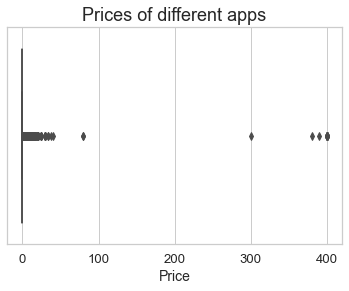

In [151]:

#Boxplot for Price
# Creating a boxplot for checking whether outliers are present or not in the column

sns.set_style(style='whitegrid')
sns.boxplot(PlayStoreData['Price'])
plt.title('Prices of different apps', fontsize=18)
plt.xlabel('Price', fontsize=14)

# We can see that there are many outliers in Price column

In [152]:
PlayStoreData.groupby('Price').max()['App']

# Following apps has highest price 

#299.99                                       I am rich VIP
#379.99                                 I am extremely Rich
#389.99                                           I Am Rich
#399.99                                          💎 I'm rich
#400.00                            I'm Rich - Trump Edition

Price
0.00      🔥 Football Wallpapers 4K | Full HD Backgrounds 😍
0.99                               pretty Easy privacy p≡p
1.00                               Wi-Fi Rabbit Unlock Key
1.20                                          sugar, sugar
1.29                           Ad Remove Plugin for App2SD
                                ...                       
299.99                                       I am rich VIP
379.99                                 I am extremely Rich
389.99                                           I Am Rich
399.99                                          💎 I'm rich
400.00                            I'm Rich - Trump Edition
Name: App, Length: 73, dtype: object

In [153]:
#Boxplot for Reviews

PlayStoreData.describe()
# we can see that in Reviews column, has many outliers

,Rating,Reviews,Size,Installs,Price
count,9360.000000,9.360000e+03,9360.000000,9.360000e+03,9360.000000
mean,4.191838,5.143767e+05,18953.080395,1.790873e+07,0.961279
std,0.515263,3.145023e+06,23018.545963,9.126637e+07,15.821640
min,1.000000,1.000000e+00,0.000000,0.000000e+00,0.000000
25%,4.000000,1.867500e+02,2400.000000,1.000000e+04,0.000000
50%,4.300000,5.955000e+03,9500.000000,5.000000e+05,0.000000
75%,4.500000,8.162750e+04,27000.000000,5.000000e+06,0.000000
max,5.000000,7.815831e+07,100000.000000,1.000000e+09,400.000000


In [154]:
PlayStoreData.groupby('App').max()['Reviews']

# following apps has highest number of reviews

App
+Download 4 Instagram Twitter                       40467.0
- Free Comics - Comic Apps                            115.0
.R                                                    259.0
/u/app                                                573.0
058.ba                                                 27.0
                                                     ...   
감성학원 BL 첫사랑                                           190.0
💎 I'm rich                                            718.0
💘 WhatsLov: Smileys of love, stickers and GIF       22098.0
📏 Smart Ruler ↔️ cm/inch measuring for homework!       19.0
🔥 Football Wallpapers 4K | Full HD Backgrounds 😍    11661.0
Name: Reviews, Length: 8190, dtype: float64

Text(0.5, 0, 'Reviews')

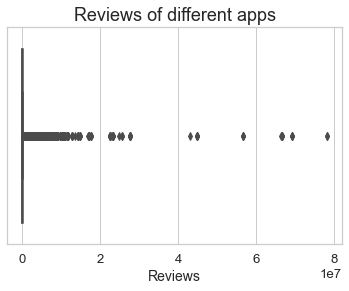

In [155]:
# Creating a boxplot for checking whether outliers are present or not in the column
sns.boxplot(PlayStoreData['Reviews'])
plt.title('Reviews of different apps', fontsize=18)
plt.xlabel('Reviews', fontsize=14)

# We can see that there are many outliers in Price column

Text(0, 0.5, 'Frequency')

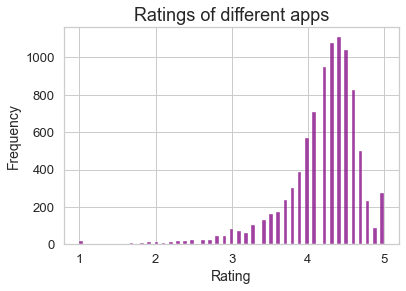

In [156]:
#Histogram for Rating

#How are the ratings distributed? Is it more toward higher ratings?

sns.histplot(PlayStoreData['Rating'],color='purple')
plt.title('Ratings of different apps', fontsize=18)
plt.xlabel('Rating', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Rating is distributed as left skewed which we can say as Negetively skewed and it is towards higher ratings
# It is looking a very good distribution as left skewed

Text(0, 0.5, 'Frequency')

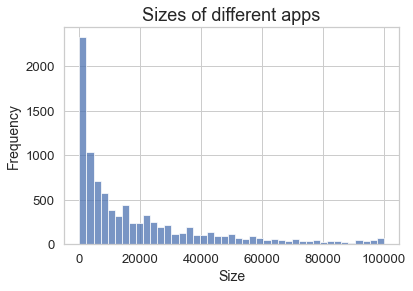

In [157]:
#Histogram for Size

sns.histplot(PlayStoreData['Size'], palette='Blues_r')
plt.title('Sizes of different apps', fontsize=18)
plt.xlabel('Size', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# we can see that the distribution is a right skewed type and it starts from higher Size and continue to lower Size

# 6. Outlier treatment:

In [158]:
## Identify and remove outliers
 

#Price: From the box plot, it seems like there are some apps with very high price. A price of $200 for an application on the Play Store is very high and suspicious!

#Check out the records with very high price

#Is 200 indeed a high price?

#Drop these as most seem to be junk apps

#Reviews: Very few apps have very high number of reviews. These are all star apps that don’t help with the analysis and, in fact, will skew it. Drop records having more than 2 million reviews.

#Installs:  There seems to be some outliers in this field too. Apps having very high number of installs should be dropped from the analysis.

#Find out the different percentiles – 10, 25, 50, 70, 90, 95, 99

#Decide a threshold as cutoff for outlier and drop records having values more than that

In [159]:
#Price: From the box plot, it seems like there are some apps with very high price. A price of $200 for an application on the Play Store is very high and suspicious!

#Check out the records with very high price

#Is 200 indeed a high price?

PlayStoreData['Price'].max()

# We can see that 400 is the highest price

400.0

In [160]:
#Drop these as most seem to be junk apps
# check for records which are greater than 200

PlayStoreData1=PlayStoreData[PlayStoreData['Price']>=200]
PlayStoreData1

# Assign that range in a new variable and get records for above mentioned condition


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4197,most expensive app (H),FAMILY,4.3,6.0,1500.0,0.0,Paid,399.99,Everyone,Entertainment,"July 16, 2018",1.0,7.0 and up
4362,💎 I'm rich,LIFESTYLE,3.8,718.0,26000.0,10000.0,Paid,399.99,Everyone,Lifestyle,"March 11, 2018",1.0.0,4.4 and up
4367,I'm Rich - Trump Edition,LIFESTYLE,3.6,275.0,7300.0,10000.0,Paid,400.00,Everyone,Lifestyle,"May 3, 2018",1.0.1,4.1 and up
5351,I am rich,LIFESTYLE,3.8,3547.0,1800.0,100000.0,Paid,399.99,Everyone,Lifestyle,"January 12, 2018",2.0,4.0.3 and up
5354,I am Rich Plus,FAMILY,4.0,856.0,8700.0,10000.0,Paid,399.99,Everyone,Entertainment,"May 19, 2018",3.0,4.4 and up
5355,I am rich VIP,LIFESTYLE,3.8,411.0,2600.0,10000.0,Paid,299.99,Everyone,Lifestyle,"July 21, 2018",1.1.1,4.3 and up
5356,I Am Rich Premium,FINANCE,4.1,1867.0,4700.0,50000.0,Paid,399.99,Everyone,Finance,"November 12, 2017",1.6,4.0 and up
5357,I am extremely Rich,LIFESTYLE,2.9,41.0,2900.0,1000.0,Paid,379.99,Everyone,Lifestyle,"July 1, 2018",1.0,4.0 and up
5358,I am Rich!,FINANCE,3.8,93.0,22000.0,1000.0,Paid,399.99,Everyone,Finance,"December 11, 2017",1.0,4.1 and up
5359,I am rich(premium),FINANCE,3.5,472.0,965.0,5000.0,Paid,399.99,Everyone,Finance,"May 1, 2017",3.4,4.4 and up


In [161]:
# Now we will drop records which price is greater than 200


PlayStoreData=PlayStoreData.drop(PlayStoreData1.index, axis=0)
PlayStoreData.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19000.0,10000.0,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14000.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8700.0,5000000.0,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,25000.0,50000000.0,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2800.0,100000.0,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [162]:
# Resetting the index

PlayStoreData.set_index( np.arange(0,len(PlayStoreData)) , inplace=True)

PlayStoreData

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19000.0,10000.0,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14000.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8700.0,5000000.0,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,25000.0,50000000.0,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2800.0,100000.0,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9340,FR Calculator,FAMILY,4.0,7.0,2600.0,0.0,Free,0.0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up
9341,Sya9a Maroc - FR,FAMILY,4.5,38.0,53000.0,5000.0,Free,0.0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
9342,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4.0,3600.0,0.0,Free,0.0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
9343,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114.0,0.0,1000.0,Free,0.0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [163]:
# We can check  Price column for max value 

PlayStoreData['Price'].max()

# We successfully drop those higher price apps and now highest Price is 79.99

79.99

In [164]:
# Reviews: Very few apps have very high number of reviews. These are all star apps that don’t help with the analysis and,
# in fact, will skew it. Drop records having more than 2 million reviews.

highreview=PlayStoreData[PlayStoreData['Reviews']>2000000]
highreview

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
131,Wattpad 📖 Free Books,BOOKS_AND_REFERENCE,4.6,2914724.0,0.0,1.000000e+08,Free,0.0,Teen,Books & Reference,"August 1, 2018",Varies with device,Varies with device
322,Messenger – Text and Video Chat for Free,COMMUNICATION,4.0,56642847.0,0.0,1.000000e+09,Free,0.0,Everyone,Communication,"August 1, 2018",Varies with device,Varies with device
323,WhatsApp Messenger,COMMUNICATION,4.4,69119316.0,0.0,1.000000e+09,Free,0.0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device
325,Google Chrome: Fast & Secure,COMMUNICATION,4.3,9642995.0,0.0,1.000000e+09,Free,0.0,Everyone,Communication,"August 1, 2018",Varies with device,Varies with device
327,Gmail,COMMUNICATION,4.3,4604324.0,0.0,1.000000e+09,Free,0.0,Everyone,Communication,"August 2, 2018",Varies with device,Varies with device
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8061,Modern Combat 5: eSports FPS,GAME,4.3,2903386.0,58000.0,1.000000e+08,Free,0.0,Mature 17+,Action,"July 24, 2018",3.2.1c,4.0 and up
8607,Google Earth,TRAVEL_AND_LOCAL,4.3,2339098.0,0.0,1.000000e+08,Free,0.0,Everyone,Travel & Local,"June 18, 2018",9.2.17.13,4.1 and up
8868,Farm Heroes Saga,FAMILY,4.4,7615646.0,71000.0,1.000000e+08,Free,0.0,Everyone,Casual,"August 7, 2018",5.2.6,2.3 and up
8871,Fallout Shelter,FAMILY,4.6,2721923.0,25000.0,1.000000e+07,Free,0.0,Teen,Simulation,"June 11, 2018",1.13.12,4.1 and up


In [165]:
# Now droping those records from the dataset

PlayStoreData=PlayStoreData.drop(highreview.index, axis=0)
PlayStoreData.head()

# Now we have all records which has less than 2 million reviews

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19000.0,10000.0,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14000.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8700.0,5000000.0,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,25000.0,50000000.0,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2800.0,100000.0,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [166]:
#Installs:  There seems to be some outliers in this field too. Apps having very high number of installs should be dropped from the analysis.

#Find out the different percentiles – 10, 25, 50, 70, 90, 95, 99

np.percentile(PlayStoreData['Installs'], [10, 25, 50, 70, 90, 95, 99])

# array([1.e+03, 1.e+04, 5.e+05, 1.e+06, 1.e+07, 1.e+07, 1.e+08])

array([1.e+03, 1.e+04, 5.e+05, 1.e+06, 1.e+07, 1.e+07, 1.e+08])

In [167]:
PlayStoreData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8892 entries, 0 to 9344
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             8892 non-null   object 
 1   Category        8892 non-null   object 
 2   Rating          8892 non-null   float64
 3   Reviews         8892 non-null   float64
 4   Size            8892 non-null   float64
 5   Installs        8892 non-null   float64
 6   Type            8892 non-null   object 
 7   Price           8892 non-null   float64
 8   Content Rating  8892 non-null   object 
 9   Genres          8892 non-null   object 
 10  Last Updated    8892 non-null   object 
 11  Current Ver     8892 non-null   object 
 12  Android Ver     8892 non-null   object 
dtypes: float64(5), object(8)
memory usage: 972.6+ KB


In [168]:
#Decide a threshold as cutoff for outlier and drop records having values more than that
# creating a thresold value for this

# We will make a thresold using lowerrange and upperrange

In [169]:
PlayStoreData2 = PlayStoreData[(PlayStoreData['Installs'] >= -7475000.0) & (PlayStoreData['Installs'] <= 12485000.0)]

In [170]:
PlayStoreData2['Installs'].mean()

2132839.9388451134

In [171]:
PlayStoreData2.describe()

,Rating,Reviews,Size,Installs,Price
count,8503.000000,8.503000e+03,8503.000000,8.503000e+03,8503.000000
mean,4.174068,6.560943e+04,18647.896919,2.132840e+06,0.366192
std,0.533307,1.680046e+05,22140.239563,3.525003e+06,2.269891
min,1.000000,1.000000e+00,0.000000,0.000000e+00,0.000000
25%,4.000000,1.330000e+02,2900.000000,1.000000e+04,0.000000
50%,4.300000,3.322000e+03,9800.000000,1.000000e+05,0.000000
75%,4.500000,4.198050e+04,26000.000000,1.000000e+06,0.000000
max,5.000000,1.852384e+06,100000.000000,1.000000e+07,79.990000


In [172]:
# 7.Bivariate analysis: Let’s look at how the available predictors relate to the variable of interest, i.e., our target variable 
# rating. Make scatter plots (for numeric features) and box plots (for character features) 
# to assess the relations between rating and the other features.

# Make scatter plot/joinplot for Rating vs. Price

# What pattern do you observe? Does rating increase with price?

# Make scatter plot/joinplot for Rating vs. Size

# Are heavier apps rated better?

# Make scatter plot/joinplot for Rating vs. Reviews

# Does more review mean a better rating always?

# Make boxplot for Rating vs. Content Rating

# Is there any difference in the ratings? Are some types liked better?

# Make boxplot for Ratings vs. Category

# Which genre has the best ratings?

# For each of the plots above, note down your observation.

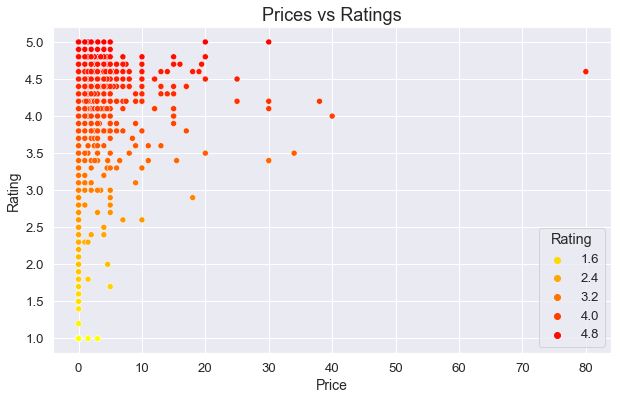

In [173]:
# Make scatter plot/joinplot for Rating vs. Price
# What pattern do you observe? Does rating increase with price?

plt.figure(figsize=(10,6))
sns.set_style(style='whitegrid',)
sns.set(font_scale=1.2)

sns.scatterplot(x=PlayStoreData2['Price'], y=PlayStoreData2['Rating'],hue= PlayStoreData2['Rating'],palette='autumn_r')
plt.title('Prices vs Ratings', fontsize=18)
plt.ylabel('Rating',fontsize=14)
plt.xlabel('Price', fontsize=14)
plt.show()

# Rating is not dependent on increase with price. Rating between 2.5 to 4, there are quite good amount of app lies with price 
# around 10 to 35. Most of app rating lies within price 40.
# Apps with rating in the range of 4 to 5, price of those apps varies 0 to 40.
# Only one app with rating 4.5 has highest price say around 80.

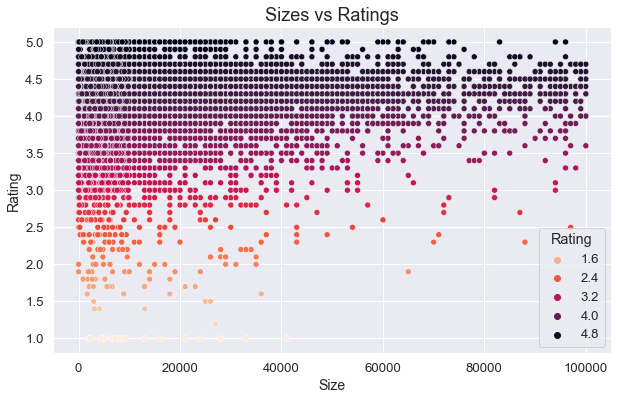

In [174]:
# Make scatter plot/joinplot for Rating vs. Size
# Are heavier apps rated better?

plt.figure(figsize=(10,6))
sns.scatterplot(x=PlayStoreData2['Size'], y=PlayStoreData2['Rating'], hue= PlayStoreData2['Rating'],palette='rocket_r')
plt.title('Sizes vs Ratings', fontsize=18)
plt.ylabel('Rating',fontsize=14)
plt.xlabel('Size', fontsize=14)
plt.show()

# Here, very few apps has rating 1 and size lies b/w 0 to 40000.
# Apps which ratings b/w 1 to 3 are scatterly spread with the size of maximum around 80000,
# But if we notice higher ratings apps, moderate number of apps size are around 100000 .
# Most of the apps has ratings between 3.5 to nearly 5 as seen in histograms.
# It is cleared that most of the app are rated higher. 
# So, we can say that most of the heavier apps rated better.

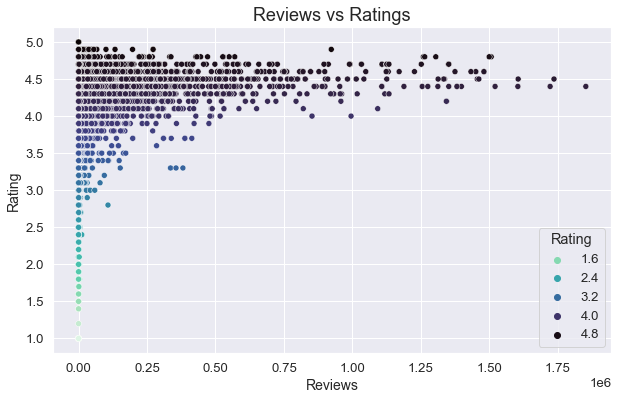

In [175]:
# Make scatter plot/joinplot for Rating vs. Reviews
# Does more review mean a better rating always?

plt.figure(figsize=(10,6))
sns.scatterplot(x=PlayStoreData2['Reviews'], y=PlayStoreData2['Rating'], hue= PlayStoreData2['Rating'], palette='mako_r')
plt.title('Reviews vs Ratings', fontsize=18)
plt.ylabel('Rating',fontsize=14)
plt.xlabel('Reviews', fontsize=14)
plt.show()

# In our plot, 
        # we noticed that lower ratings apps has very low reviews nearly zero.
        # Ratings b/w 3.5 to 4 has moderate number of Reviews.
        # Ratings from 4 and higher has higher number of reviews, and some of the apps has higher reviews .
        # If we see the histograms for ratings, most of records lies b/w 3.5 to nearly 5.
        # We conclude that more review means a better rating always.

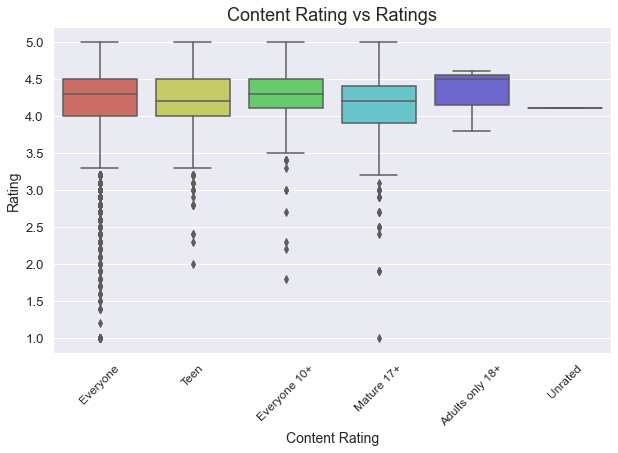

In [176]:
# Make boxplot for Rating vs. Content Rating
# Is there any difference in the ratings? Are some types liked better?

plt.figure(figsize= (10,6))
sns.boxplot(x = 'Content Rating', y = 'Rating', data = PlayStoreData2, palette='hls')
plt.title('Content Rating vs Ratings', fontsize=18)
plt.xticks(fontsize=12, rotation='45')
plt.ylabel('Rating',fontsize=14)
plt.xlabel('Content Rating', fontsize=14)
plt.show()

# Everyone: here, max rating given is 5 and low rating is around 3.3, but lots of people gave lower rating in this kind of apps.
#           median is lies around 4.4.

# Teen: In this type of apps, max and min ratings are 5 and closely 3.4, median lies around close to 4.
#       Some people gave relatively low ratings as well.

# Everyone 10: This kind of apps, max and min ratings are around 3.5 to 5 and median is around 4.4.
#              few people gave some low ratings also.

# Mature 17:  This kind of app, max and min ratings are around 3.1 to 5 and median is around 4.3.
#             it has also some low ratings.

# Adults only 18+: This kind of apps, max and min ratings are around 3.8 to 4.5 and median is around 4.5.
#                  Here, no lower rating has provided by users and this is most compact app and here no ouliers present.

# Unrated: all values are same.

# so, we noticed that there are quite variation between all kinds of apps.
# it can be said that  "Adults only 18+"  more better apps than others.

In [177]:
PlayStoreData2['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION'],
      dtype=object)

Text(0, 0.5, 'Rating')

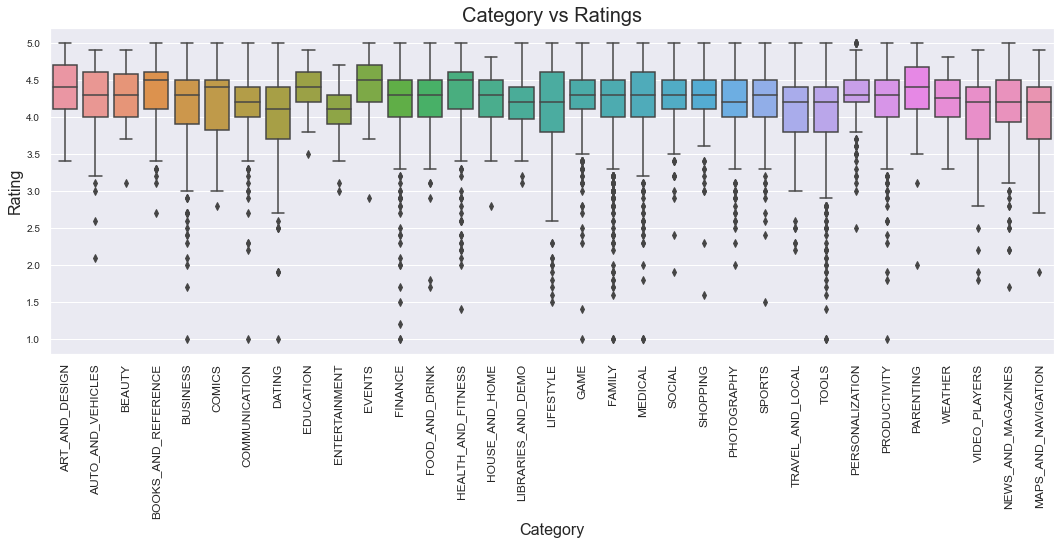

In [178]:
# Make boxplot for Ratings vs. Category

plt.figure(figsize= (18,6))
sns.boxplot(x = 'Category', y = 'Rating', data = PlayStoreData2)
plt.title('Category vs Ratings', fontsize=20)
plt.xticks(fontsize=12, rotation = 'vertical')
plt.yticks(fontsize=10)
plt.xlabel("Category",fontsize=16)
plt.ylabel("Rating",fontsize=16)

# 'ART_AND_DESIGN' and 'WEATHER' has no outliers.
# 'EDUCATION' has minimum no of ratings, means users are not interested to install this knds of apps
# FINANCE, BUSINESS, LIFESTYLE ,GAME, FAMILY have highst no of ratings means most of the people installed these kind of apps.
# In this figure, we noticed that in most of the apps users gave ratings b/w 1 to 5.
# Users are interrested more about FINANCE, BUSINESS, LIFESTYLE ,GAME, FAMILY apps, so we can say creater of these kinds of apps
# need to create more apps related to this.
# In DATING and LIFESTYLE apps difference b/w min value and Q1 are quite high.
# Here are somme apps which has lower ratings also.

In [179]:
# 'Art & Design', 'Business','Dating', 'Finance', 
  #     'Health & Fitness', 'Lifestyle', 'News & Magazines',
   #    'Maps & Navigation', 'Tools', 

In [180]:
# Which genre has the best ratings?

PlayStoreData2['Genres'].value_counts()

# Following Genres has highest number of ratings
# Tools                                672
# Entertainment                        501
# Education                            468
# Medical                              350
# Finance                              311

Tools                                  672
Entertainment                          501
Education                              468
Medical                                350
Finance                                311
                                      ... 
Arcade;Pretend Play                      1
Comics;Creativity                        1
Entertainment;Education                  1
Card;Brain Games                         1
Health & Fitness;Action & Adventure      1
Name: Genres, Length: 115, dtype: int64

In [181]:
PlayStoreData2.columns.tolist()

['App',
 'Category',
 'Rating',
 'Reviews',
 'Size',
 'Installs',
 'Type',
 'Price',
 'Content Rating',
 'Genres',
 'Last Updated',
 'Current Ver',
 'Android Ver']

In [182]:
PlayStoreData2['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION'],
      dtype=object)

In [183]:
len(PlayStoreData2['Category'].unique())

33

In [184]:
PlayStoreData2['Genres'].unique()

array(['Art & Design', 'Art & Design;Pretend Play',
       'Art & Design;Creativity', 'Auto & Vehicles', 'Beauty',
       'Books & Reference', 'Business', 'Comics', 'Comics;Creativity',
       'Communication', 'Dating', 'Education', 'Education;Creativity',
       'Education;Education', 'Education;Music & Video',
       'Education;Action & Adventure', 'Education;Pretend Play',
       'Education;Brain Games', 'Entertainment',
       'Entertainment;Brain Games', 'Entertainment;Creativity',
       'Entertainment;Music & Video', 'Events', 'Finance', 'Food & Drink',
       'Health & Fitness', 'House & Home', 'Libraries & Demo',
       'Lifestyle', 'Lifestyle;Pretend Play', 'Card', 'Casual', 'Puzzle',
       'Action', 'Arcade', 'Word', 'Racing', 'Casual;Creativity',
       'Sports', 'Board', 'Simulation', 'Role Playing', 'Adventure',
       'Strategy', 'Simulation;Education', 'Action;Action & Adventure',
       'Trivia', 'Casual;Brain Games', 'Simulation;Action & Adventure',
       'Education

# 8. Data preprocessing

In [185]:

# For the steps below, create a copy of the dataframe to make all the edits. Name it inp1.

inp1 = PlayStoreData2.copy(deep=True)
inp1

# we have copied our dataframe in inp1, because what we will change our dataframe for further steps 
# Our main dataframe will be intact.

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19000.0,10000.0,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14000.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8700.0,5000000.0,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2800.0,100000.0,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167.0,5600.0,50000.0,Free,0.0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9340,FR Calculator,FAMILY,4.0,7.0,2600.0,0.0,Free,0.0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up
9341,Sya9a Maroc - FR,FAMILY,4.5,38.0,53000.0,5000.0,Free,0.0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
9342,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4.0,3600.0,0.0,Free,0.0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
9343,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114.0,0.0,1000.0,Free,0.0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [186]:
# Reviews and Install have some values that are still relatively very high. Before building a linear regression model,
# you need to reduce the skew. Apply log transformation (np.log1p) to Reviews and Installs.

inp1['Reviews'] = np.log(inp1['Reviews'])

In [187]:
inp1['Reviews'].head()

# We have successfully converted values with log function
#0     5.075174
#1     6.875232
#2    11.379520
#4     6.875232
#5     5.123964

0     5.068904
1     6.874198
2    11.379508
4     6.874198
5     5.117994
Name: Reviews, dtype: float64

In [188]:
inp1['Installs'] = np.log1p(inp1['Installs'])

In [189]:
inp1['Installs'].head()

# We have successfully converted values with log function
#0     9.210440
#1    13.122365
#2    15.424949
#4    11.512935
#5    10.819798

0     9.210440
1    13.122365
2    15.424949
4    11.512935
5    10.819798
Name: Installs, dtype: float64

In [190]:
inp1.describe()

,Rating,Reviews,Size,Installs,Price
count,8503.000000,8503.000000,8503.000000,8503.000000,8503.000000
mean,4.174068,7.743829,18647.896919,11.339223,0.366192
std,0.533307,3.488472,22140.239563,4.300991,2.269891
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,4.000000,4.890349,2900.000000,9.210440,0.000000
50%,4.300000,8.108322,9800.000000,11.512935,0.000000
75%,4.500000,10.644960,26000.000000,13.815512,0.000000
max,5.000000,14.431984,100000.000000,16.118096,79.990000


In [191]:
inp1.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,5.068904,19000.0,9.210440,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,6.874198,14000.0,13.122365,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,11.379508,8700.0,15.424949,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,6.874198,2800.0,11.512935,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,5.117994,5600.0,10.819798,Free,0.0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up


In [192]:
# Drop columns App, Last Updated, Current Ver, and Android Ver. These variables are not useful for our task.

inp1.drop(['App','Last Updated','Current Ver','Android Ver'], axis = 1,inplace=True)
inp1.head()

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres
0,ART_AND_DESIGN,4.1,5.068904,19000.0,9.210440,Free,0.0,Everyone,Art & Design
1,ART_AND_DESIGN,3.9,6.874198,14000.0,13.122365,Free,0.0,Everyone,Art & Design;Pretend Play
2,ART_AND_DESIGN,4.7,11.379508,8700.0,15.424949,Free,0.0,Everyone,Art & Design
4,ART_AND_DESIGN,4.3,6.874198,2800.0,11.512935,Free,0.0,Everyone,Art & Design;Creativity
5,ART_AND_DESIGN,4.4,5.117994,5600.0,10.819798,Free,0.0,Everyone,Art & Design


In [193]:
# Converting Type column with dummy variables and concatenating with main DataFrame

inp1 = pd.concat( [inp1.iloc[:,[0,1,2,3,4,6,7,8]], pd.get_dummies(inp1['Type'])] , axis = 1)


In [194]:
inp1

,Category,Rating,Reviews,Size,Installs,Price,Content Rating,Genres,Free,Paid
0,ART_AND_DESIGN,4.1,5.068904,19000.0,9.210440,0.0,Everyone,Art & Design,1,0
1,ART_AND_DESIGN,3.9,6.874198,14000.0,13.122365,0.0,Everyone,Art & Design;Pretend Play,1,0
2,ART_AND_DESIGN,4.7,11.379508,8700.0,15.424949,0.0,Everyone,Art & Design,1,0
4,ART_AND_DESIGN,4.3,6.874198,2800.0,11.512935,0.0,Everyone,Art & Design;Creativity,1,0
5,ART_AND_DESIGN,4.4,5.117994,5600.0,10.819798,0.0,Everyone,Art & Design,1,0
...,...,...,...,...,...,...,...,...,...,...
9340,FAMILY,4.0,1.945910,2600.0,0.000000,0.0,Everyone,Education,1,0
9341,FAMILY,4.5,3.637586,53000.0,8.517393,0.0,Everyone,Education,1,0
9342,FAMILY,5.0,1.386294,3600.0,0.000000,0.0,Everyone,Education,1,0
9343,BOOKS_AND_REFERENCE,4.5,4.736198,0.0,6.908755,0.0,Mature 17+,Books & Reference,1,0


In [195]:
# Get dummy columns for Category, Genres, and Content Rating. This needs to be done as the models do not understand categorical data, 
# and all data should be numeric. Dummy encoding is one way to convert character fields to numeric. 
# Name of dataframe should be inp2.

cat_cols = ['Category', 'Genres', 'Content Rating']
#inp2=pd.concat( [pd.get_dummies(inp1,columns=cat_cols,drop_first=True),inp1.iloc[:,[0,1,3,4,5,6,7]] ] , axis = 1)
#print(inp2.columns)

In [196]:
inp1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8503 entries, 0 to 9344
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Category        8503 non-null   object 
 1   Rating          8503 non-null   float64
 2   Reviews         8503 non-null   float64
 3   Size            8503 non-null   float64
 4   Installs        8503 non-null   float64
 5   Price           8503 non-null   float64
 6   Content Rating  8503 non-null   object 
 7   Genres          8503 non-null   object 
 8   Free            8503 non-null   uint8  
 9   Paid            8503 non-null   uint8  
dtypes: float64(5), object(3), uint8(2)
memory usage: 934.5+ KB


In [197]:
inp3 = pd.get_dummies(inp1,columns=cat_cols,drop_first=True)

## 9. Train test split  and apply 70-30 split. Name the new dataframes df_train and df_test.

In [198]:


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [199]:
inp3

,Rating,Reviews,Size,Installs,Price,Free,Paid,Category_AUTO_AND_VEHICLES,Category_BEAUTY,Category_BOOKS_AND_REFERENCE,...,Genres_Video Players & Editors,Genres_Video Players & Editors;Creativity,Genres_Video Players & Editors;Music & Video,Genres_Weather,Genres_Word,Content Rating_Everyone,Content Rating_Everyone 10+,Content Rating_Mature 17+,Content Rating_Teen,Content Rating_Unrated
0,4.1,5.068904,19000.0,9.210440,0.0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,3.9,6.874198,14000.0,13.122365,0.0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,4.7,11.379508,8700.0,15.424949,0.0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,4.3,6.874198,2800.0,11.512935,0.0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
5,4.4,5.117994,5600.0,10.819798,0.0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9340,4.0,1.945910,2600.0,0.000000,0.0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
9341,4.5,3.637586,53000.0,8.517393,0.0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
9342,5.0,1.386294,3600.0,0.000000,0.0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
9343,4.5,4.736198,0.0,6.908755,0.0,1,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0


In [200]:
inp3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8503 entries, 0 to 9344
Columns: 158 entries, Rating to Content Rating_Unrated
dtypes: float64(5), uint8(153)
memory usage: 1.9 MB


In [201]:
# creating features and labels 

features = inp3.iloc[:,1:].values
labels = inp3.iloc[:,[0]].values

In [202]:
labels

array([[4.1],
       [3.9],
       [4.7],
       ...,
       [5. ],
       [4.5],
       [4.5]])

In [203]:
features

array([[5.06890420e+00, 1.90000000e+04, 9.21044037e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [6.87419850e+00, 1.40000000e+04, 1.31223654e+01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.13795084e+01, 8.70000000e+03, 1.54249487e+01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [1.38629436e+00, 3.60000000e+03, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [4.73619845e+00, 0.00000000e+00, 6.90875478e+00, ...,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.28949783e+01, 1.90000000e+04, 1.61180958e+01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

## 10. Separate the dataframes into X_train, y_train, X_test, and y_test.

In [244]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(features,
                                                 labels,
                                                 test_size=0.3,
                                                 random_state=150)


In [245]:
# Name the new dataframes df_train and df_test.

df_train=pd.DataFrame(X_train)
df_test=pd.DataFrame(X_test)

In [246]:
len(X_train)

5952

In [247]:
len(X_test)

2551

In [248]:
inp3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8503 entries, 0 to 9344
Columns: 158 entries, Rating to Content Rating_Unrated
dtypes: float64(5), uint8(153)
memory usage: 1.9 MB


## 11 . Model building

In [249]:

# Use linear regression as the technique


from sklearn.linear_model import LinearRegression

model = LinearRegression()



In [250]:
model.fit(X_train,y_train)

LinearRegression()

In [251]:
model.intercept_

array([4.16312107])

In [252]:
model.coef_

array([[ 1.18820119e-01,  2.02595398e-07, -7.91656367e-02,
         1.14801170e-03,  7.68314604e-03, -7.68314604e-03,
        -1.83858053e-03,  5.25296465e-02,  4.59897601e-02,
        -5.31821879e-02,  1.72540621e-01, -1.10483932e-01,
        -1.31257171e-01, -2.83050496e-01, -3.90799917e-01,
         6.17026515e-02, -2.75336087e-01, -6.75467595e-02,
        -6.71184534e-02, -1.18189288e-01, -9.40668340e-03,
        -4.05397090e-02, -3.33337943e-02, -8.81705962e-02,
        -1.14751206e-01, -3.88138650e-03, -7.52520498e-02,
        -3.80939469e-02,  2.25398157e-02, -7.14004820e-02,
        -5.51922522e-02, -2.92689464e-02, -3.37464432e-02,
        -2.42298275e-01, -6.80517381e-02, -7.71325847e-02,
        -2.75351659e-01, -4.32599892e-02,  1.65255359e-01,
        -4.15976099e-02,  1.51941317e-01,  2.25930386e-14,
        -1.20453152e-01, -2.29682154e-04,  2.13929247e-01,
         3.94593564e-01,  1.90562369e-01,  1.75070555e-01,
        -2.81264212e-03, -1.83858053e-03,  5.25296465e-0

### Report the r2 on the train set

In [253]:
 
from sklearn.metrics import r2_score

y_train_pred= model.predict(X_train)
Train=r2_score(y_train, y_train_pred)



## 12. Make predictions on test set, report R2

In [254]:


y_test_pred= model.predict(X_test)
Test=r2_score(y_test, y_test_pred)



In [255]:
print('Train Accuracy is {} \nTest Accuracy is {}'.format(Train, Test))

Train Accuracy is 0.14719609735336925 
Test Accuracy is 0.15721835162596354


In [256]:
# 'Art & Design', 'Business','Dating', 'Finance', 
  #     'Health & Fitness', 'Lifestyle', 'News & Magazines',
   #    'Maps & Navigation', 'Tools',

# This kinds of apps has highest number of ratings on playstore
# So, it is hereby recommended that with this kind of app playstore should promote and proudces.